<a href="https://colab.research.google.com/github/abhinandc15/TCS-iON-INTERNSHIP-PROJECT/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns
!pip install --upgrade xlrd

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.labelsize']=15
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [7]:
df =pd.read_excel(r'https://github.com/abhinandc15/TCS-iON-INTERNSHIP-PROJECT/blob/4f58a79d9a6496b2ef4b9f5073962f2dd464e8a8/DATASET/Sample%20-%20Superstore.xls?raw=true',parse_dates=['Order Date'])

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Cleaning the dataset

## Furniture

In [10]:
furniture = df.loc[df['Category']=='Furniture']
furniture
furniture['Order Date'].min(),furniture['Order Date'].max()
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [11]:
furniture=furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [12]:
furniture=furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

## Office supplies

In [13]:
Office_Supplies = df.loc[df['Category']=='Office Supplies']
Office_Supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [14]:
Office_Supplies['Order Date'].min(),Office_Supplies['Order Date'].max()
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
Office_Supplies.drop(cols,axis=1,inplace=True)
Office_Supplies
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


In [15]:
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies.isnull().sum()
Office_Supplies=Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies=Office_Supplies.set_index('Order Date')
Office_Supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

## Technology

In [16]:
Technology = df.loc[df['Category']=='Technology']
Technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [17]:
Technology['Order Date'].min(),Technology['Order Date'].max()
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
Technology.drop(cols,axis=1,inplace=True)
Technology


,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [18]:
Technology=Technology.sort_values('Order Date')
Technology
Technology=Technology.sort_values('Order Date')
Technology.isnull().sum()
Technology=Technology.groupby('Order Date')['Sales'].sum().reset_index()
Technology=Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

# Visualization

## Furniture

Text(0.5, 1.0, 'Furniture Sales')

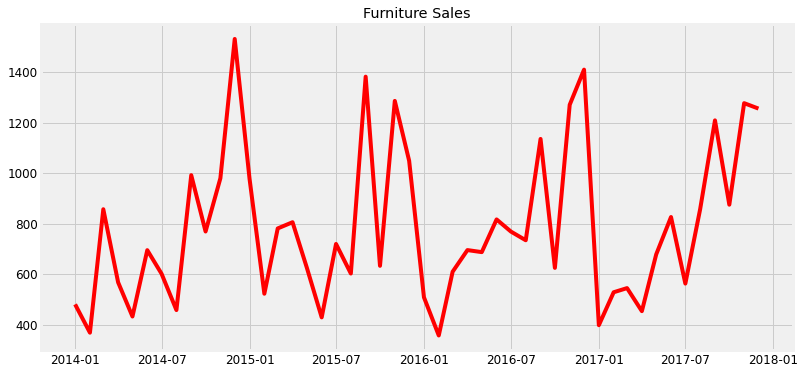

In [19]:
yf=furniture['Sales'].resample('MS').mean()
yf
plt.figure(figsize=(12,6))
fig=plt.plot(yf,color='r')
plt.title("Furniture Sales")

## Office supplies

Text(0.5, 1.0, 'Office_Supplies Sales')

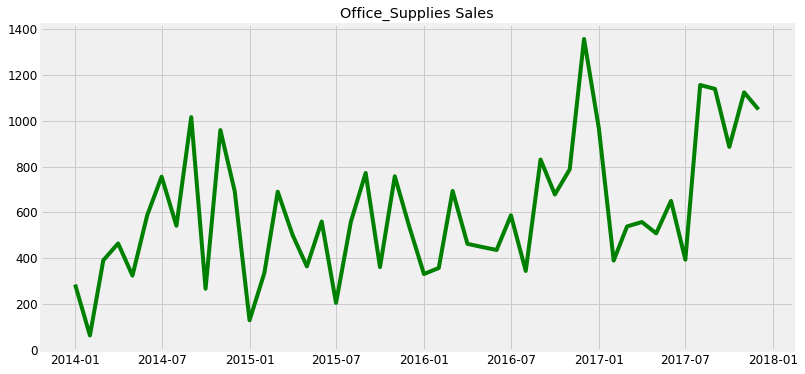

In [20]:
yo=Office_Supplies['Sales'].resample('MS').mean()
yo
plt.figure(figsize=(12,6))
fig=plt.plot(yo,color='g')
plt.title("Office_Supplies Sales")

## Technology

Text(0.5, 1.0, 'Technology Sales')

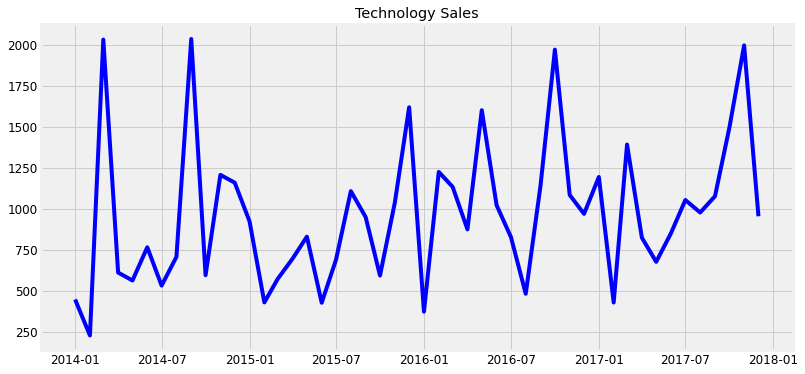

In [21]:
yt=Technology['Sales'].resample('MS').mean()
yt
plt.figure(figsize=(12,6))
fig=plt.plot(yt,color='b')
plt.title("Technology Sales")

# Decomposition

## Furniture

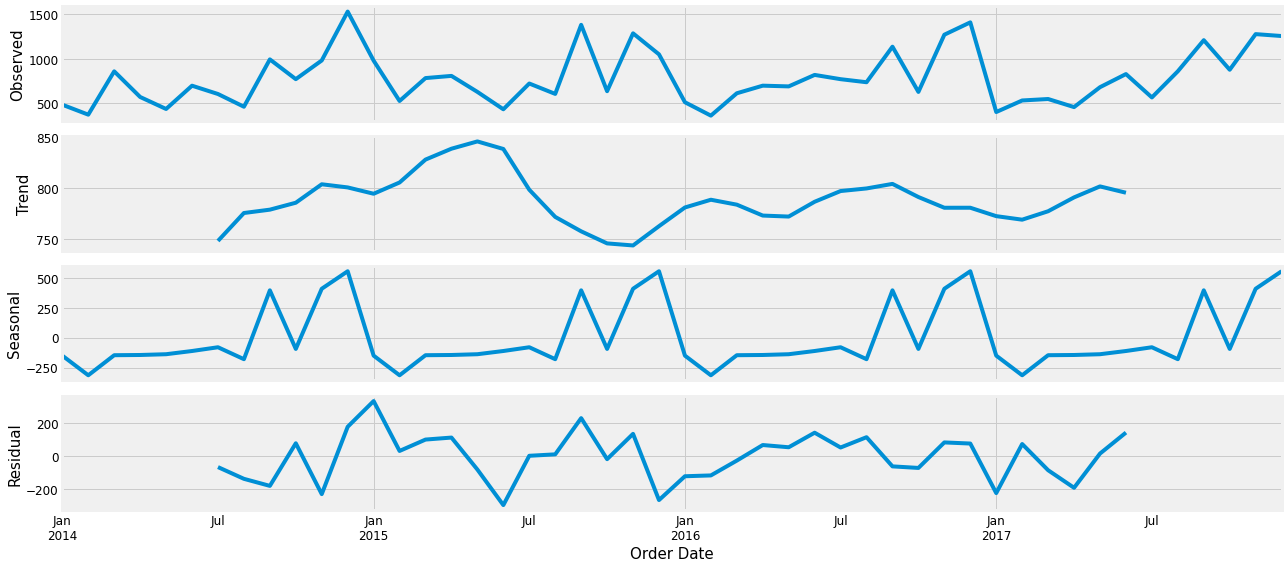

In [22]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yf,model='addictive')
fig=decomposition.plot()
plt.show()

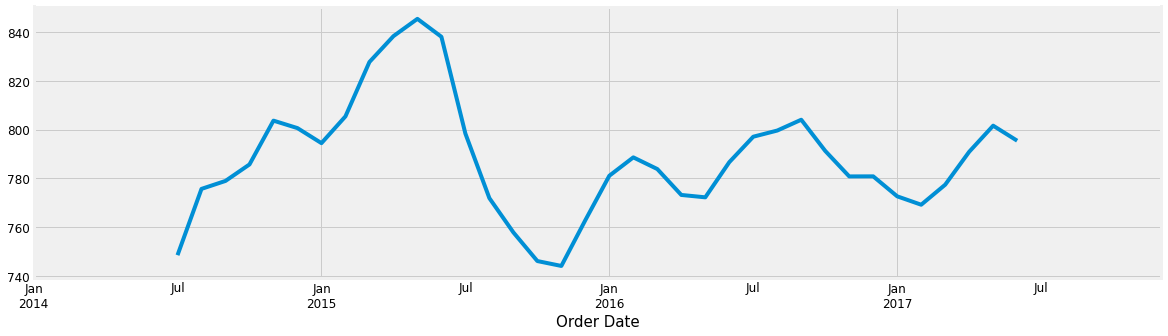

In [23]:
decomposition.trend.plot(figsize=(18,5))

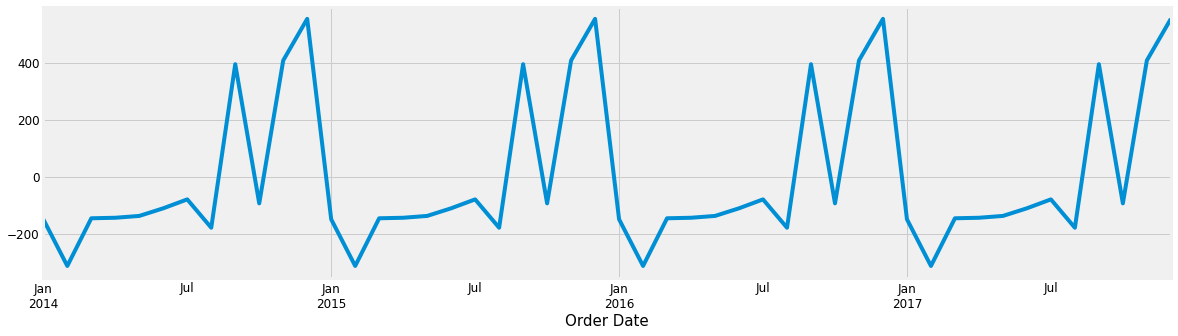

In [24]:
decomposition.seasonal.plot(figsize=(18,5))

## Office supplies

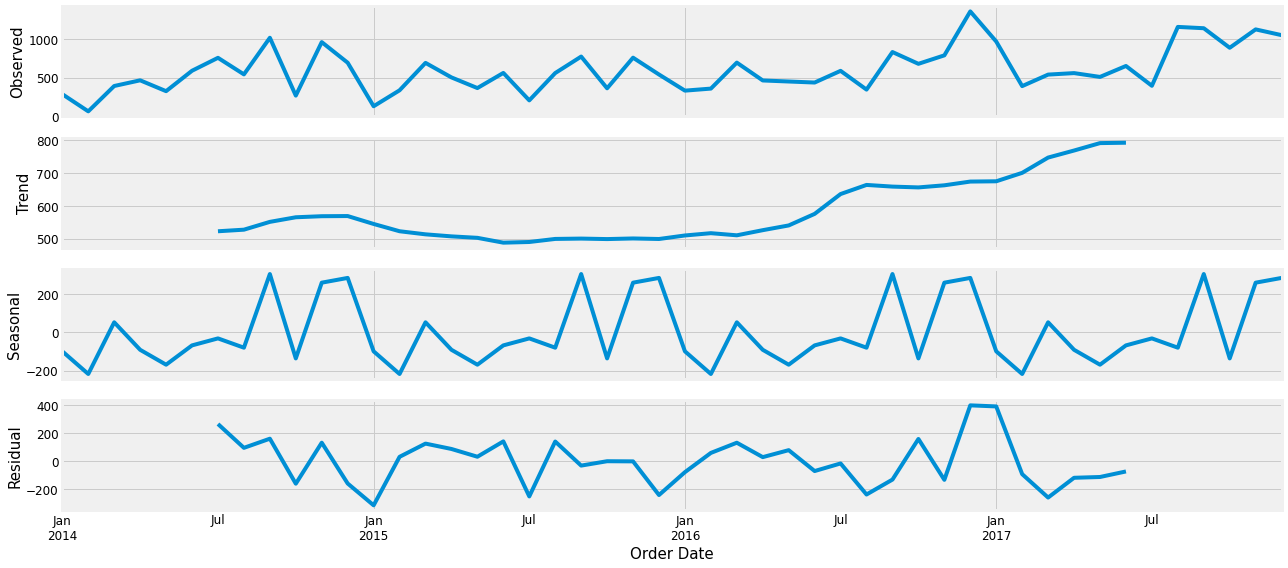

In [25]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yo,model='addictive')
fig=decomposition.plot()
plt.show()

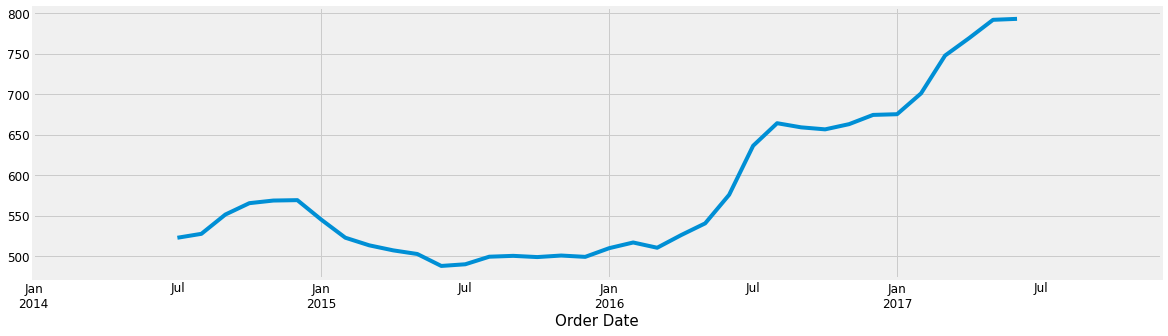

In [26]:
decomposition.trend.plot(figsize=(18,5))

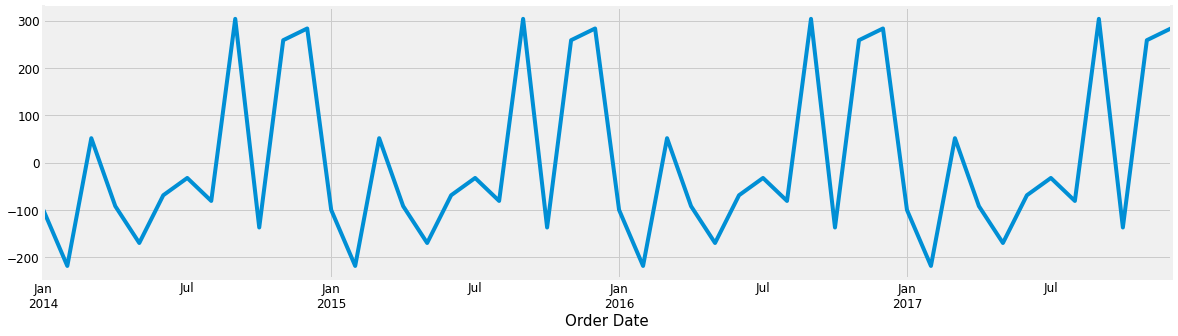

In [27]:
decomposition.seasonal.plot(figsize=(18,5))

## Technology

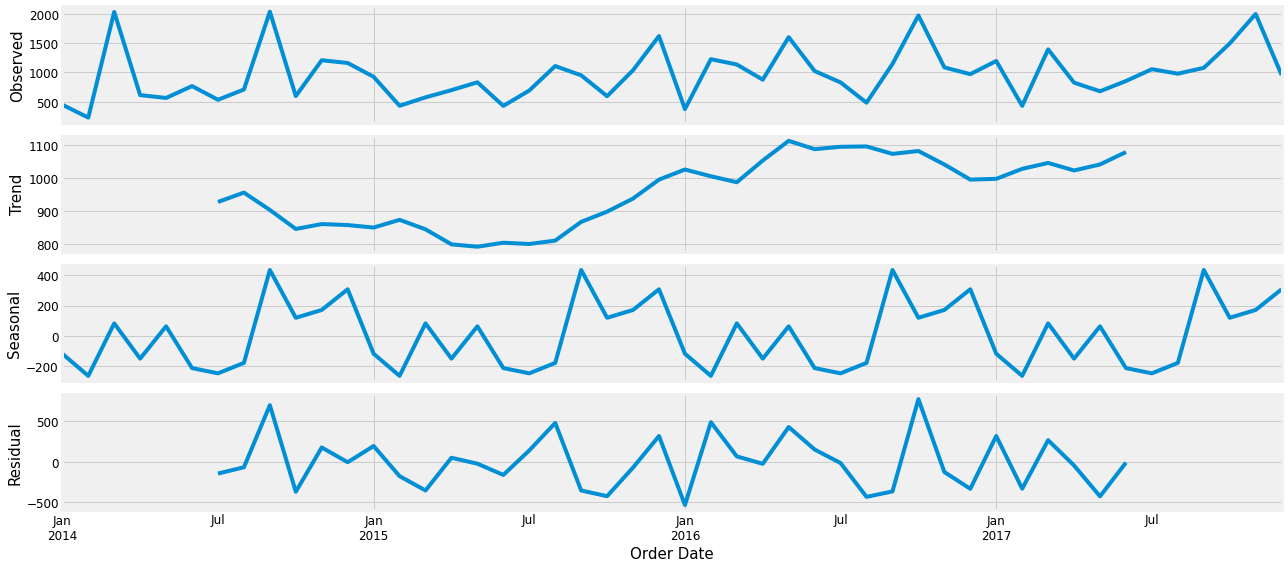

In [28]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yt,model='addictive')
fig=decomposition.plot()
plt.show()

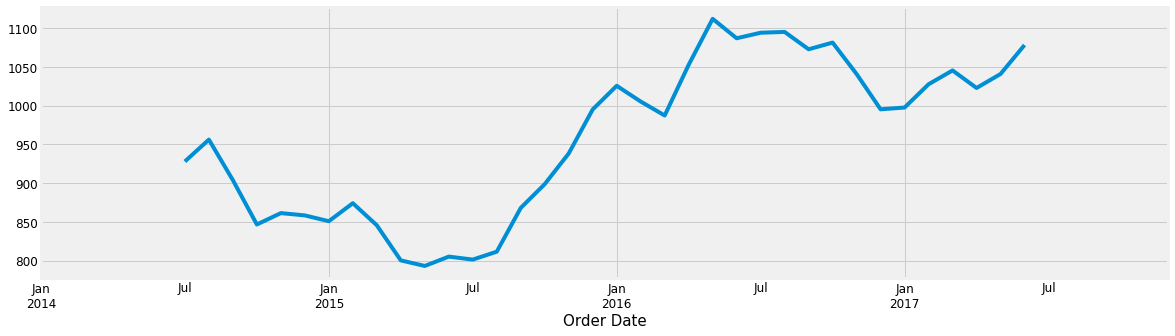

In [29]:
decomposition.trend.plot(figsize=(18,5))

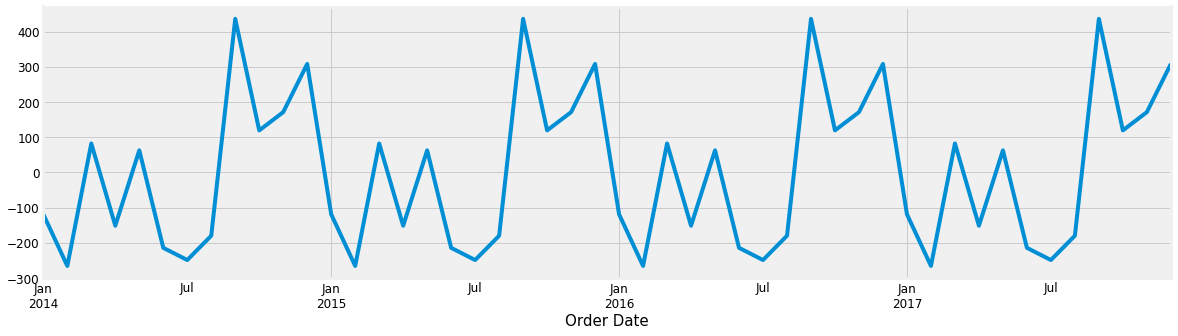

In [30]:
decomposition.seasonal.plot(figsize=(18,5))

# pdq Parameter estimation

# Furniture

In [31]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinatios for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinatios for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


In [32]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(yf,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_f=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_f.aic))
        except:
            continue
mod =sm.tsa.statespace.SARIMAX(yf,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_f = mod.fit()
print(results_f.summary().tables[1])
 

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:769.0817523205915
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1448.0635864531782
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:477.7170130919703
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:497.2314433418338
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1314.9135794091435
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:318.0047199116341
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:720.9252270758096
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2931.4459685689417
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:466.5607429809145
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:499.588499811078
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2578.407685878101
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:319.9884876946868
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:677.8947668259312
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1363.5571341107245
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:486.6378567269187
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:497.78896630044073
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1379.5770594611533
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:319.7714068109212
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:649.90

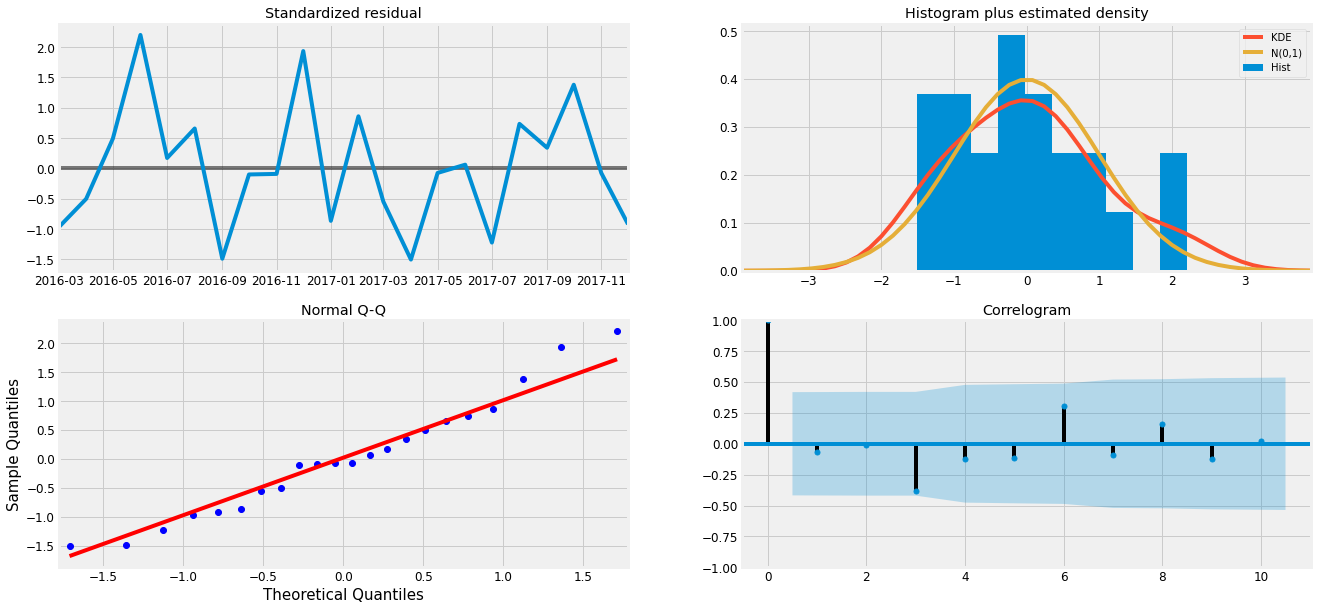

In [33]:
results_f.plot_diagnostics(figsize=(20,10))
plt.show() 

### office supplies

In [34]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(yo,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_o=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_o.aic))
        except:
            continue
mod =sm.tsa.statespace.SARIMAX(yo,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_o = mod.fit()
print(results_o.summary().tables[1])


ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:747.1990404227043
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1711.705618508037
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:500.7335398771617
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:516.0876543936834
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1605.6876886645937
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:347.4448856348972
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:702.6891395292489
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:nan
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:487.7601415814757
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:517.4952646586532
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2953.2193796604042
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:345.692209446014
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:666.4572045007284
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1118.748924708641
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:503.0840747570295
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:500.0109385290892
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1155.2392727315817
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:335.7148959418817
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:637.3530008828176
ARIMA

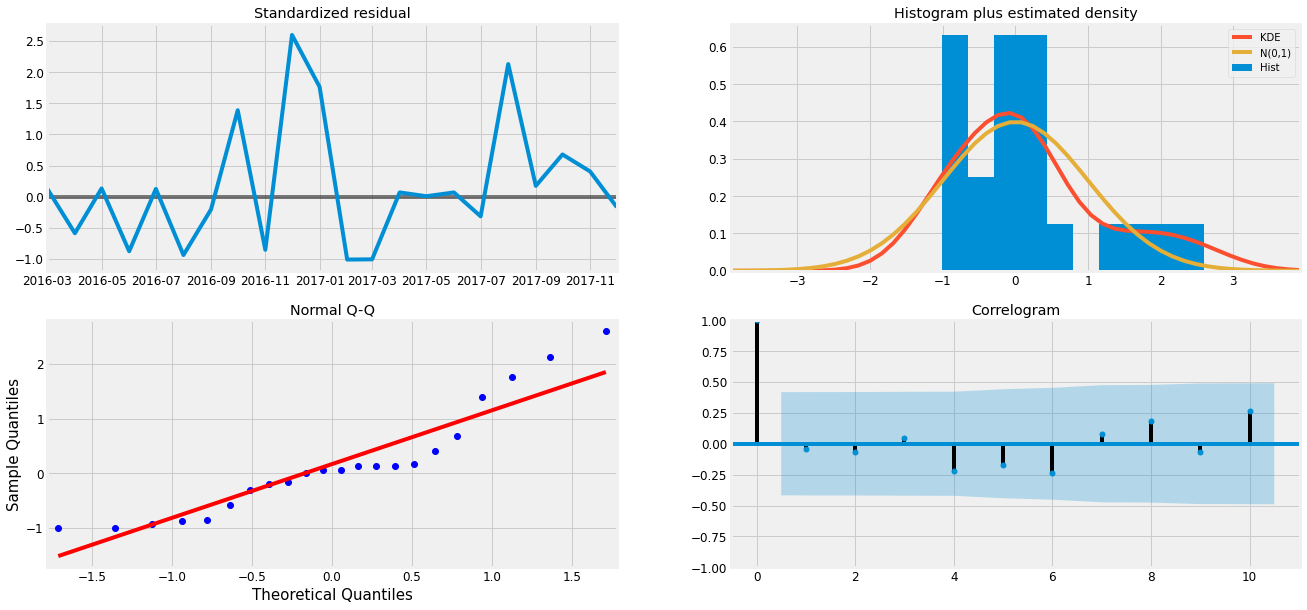

In [35]:
results_o.plot_diagnostics(figsize=(20,10))
plt.show() 

### TECHNOLOGY

In [36]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(yt,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_t=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_t.aic))
        except:
            continue
mod =sm.tsa.statespace.SARIMAX(yt,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_t= mod.fit()
print(results_t.summary().tables[1])

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:791.4891765009955
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1521.8309719094264
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:549.0156237882129
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:564.1031529698099
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1159.7567745383337
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:372.6612068172691
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:750.8969484750883
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:nan
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:535.0489454747161
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:566.0827904028714
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:7560.605143907636
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:373.876006586865
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:729.3478530285049
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1506.6730128083518
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:562.7585880992684
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:543.3082156228088
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1342.7580215303328
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:377.03544814349607
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:675.9599897483575
ARI

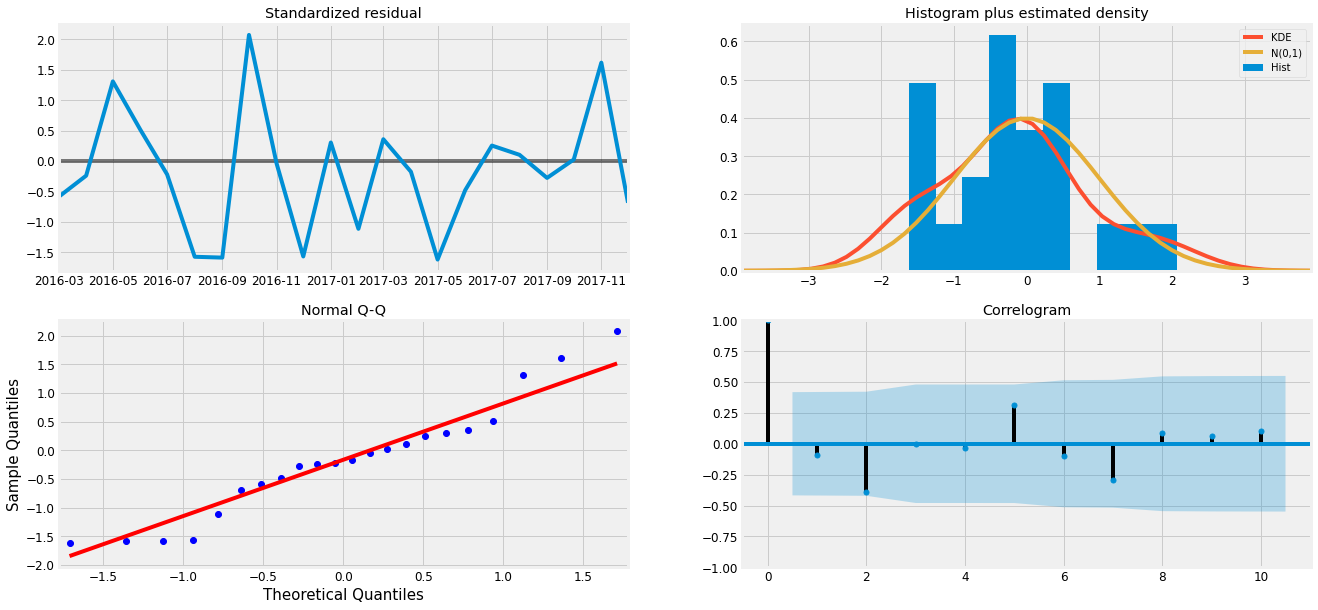

In [37]:
results_t.plot_diagnostics(figsize=(20,10))
plt.show()  

# VALIDATING PREDICTIONS

## FURNTIURE

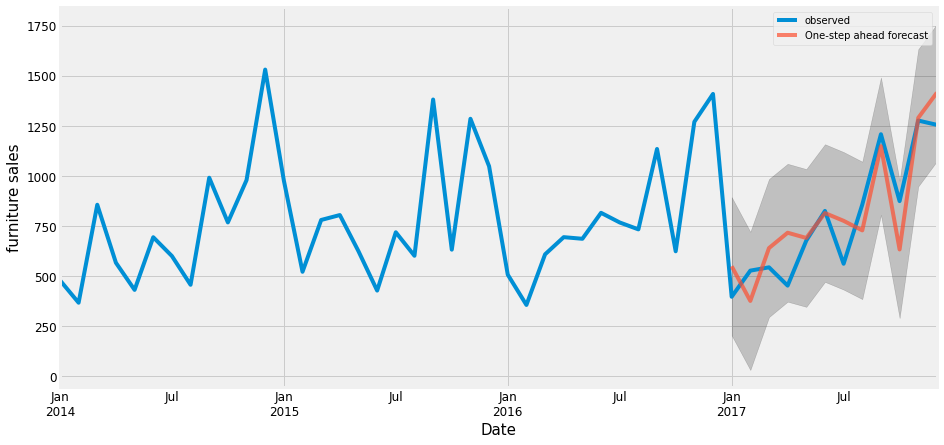

In [38]:
pred=results_f.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yf['2014':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('furniture sales')
plt.legend()
plt.show()

### MSE AND RMSE

In [39]:
yf_forecast=pred.predicted_mean
yf_truth = yf['2017-01-01':]
mse = ((yf_forecast-yf_truth)**2).mean()
print('The mean squared Error of our forecasts is{}'.format(round(mse,2)))
print('The root mean squared  error of our forecaste is {}'.format(round(np.sqrt(mse),2)))

The mean squared Error of our forecasts is22993.58
The root mean squared  error of our forecaste is 151.64


## OFFICE_SUPPLIES

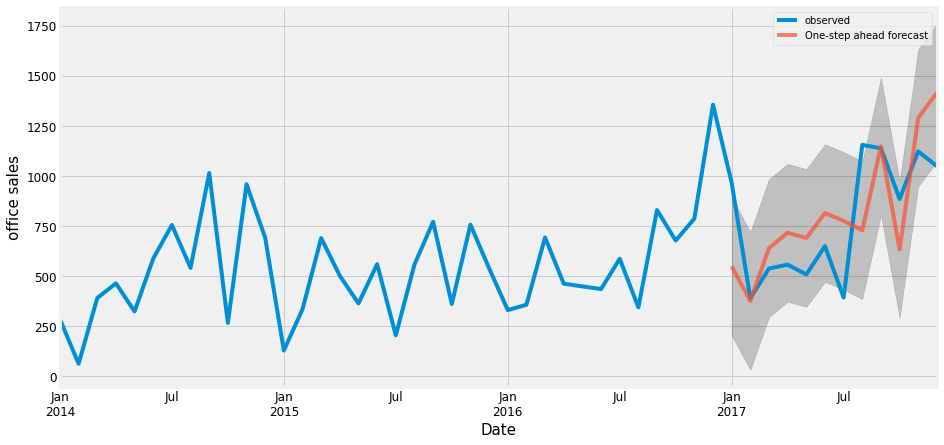

In [40]:
pred=results_f.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yo['2014':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('office sales')
plt.legend()
plt.show()

In [41]:
yo_forecast=pred.predicted_mean
yo_truth = yo['2017-01-01':]
mse = ((yo_forecast - yo_truth) **2).mean()
print('The mean squared Error of our forecasts is{}'.format(round(mse,2)))
print('The root mean squared  error of our forecaste is {}'.format(round(np.sqrt(mse),2)))

The mean squared Error of our forecasts is68854.31
The root mean squared  error of our forecaste is 262.4


## TECHNOLOGY

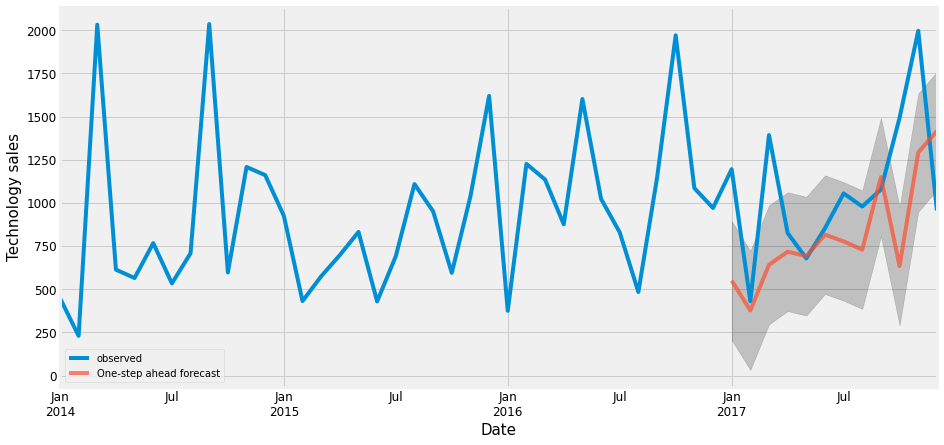

In [42]:
pred=results_f.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yt['2014':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology sales')
plt.legend()
plt.show()

In [43]:
yt_forecast=pred.predicted_mean
yt_truth = yt['2017-01-01':]
mse = ((yt_forecast - yt_truth) **2).mean()
print('The mean squared Error of our forecasts is{}'.format(round(mse,2)))
print('The root mean squared  error of our forecaste is {}'.format(round(np.sqrt(mse),2)))

The mean squared Error of our forecasts is215979.35
The root mean squared  error of our forecaste is 464.74


# PREDICTING SALES FOR UPCOMING YEARS


## FURNITURE

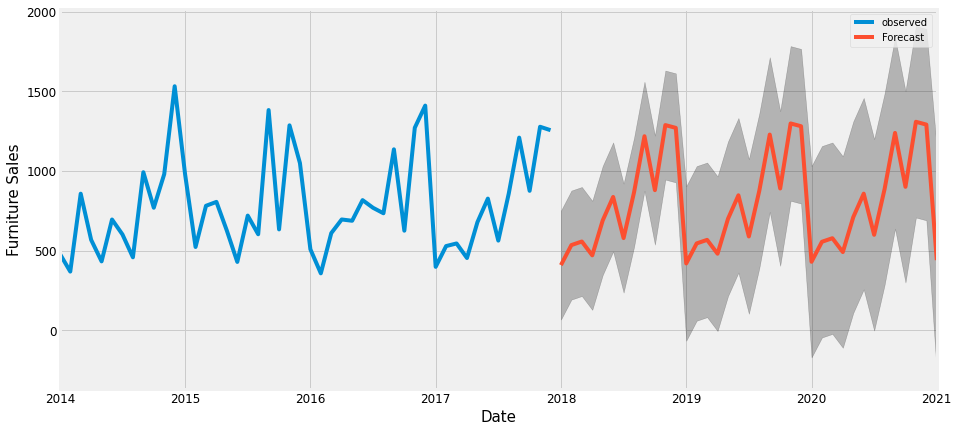

In [44]:
pred_uc=results_f.get_forecast(steps=37)
pred_ci=pred_uc.conf_int()
ax=yf.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## OFFICE SUPPLIES

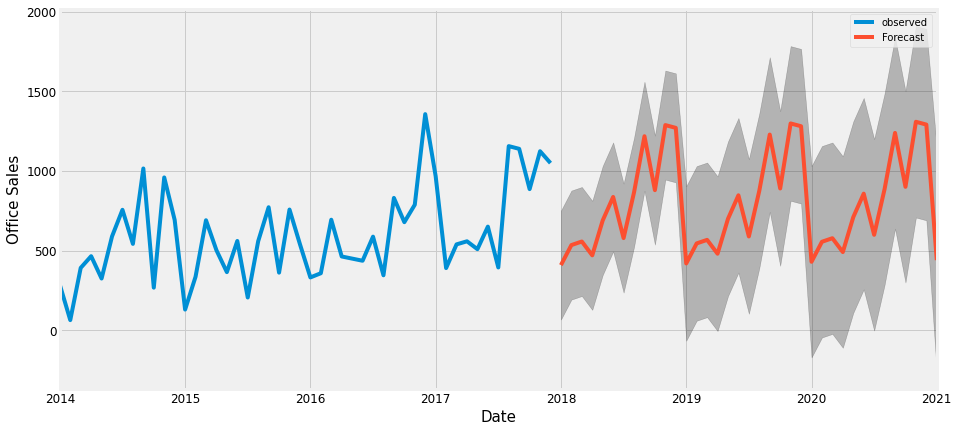

In [45]:
pred_uc=results_f.get_forecast(steps=37)
pred_ci=pred_uc.conf_int()
ax=yo.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Sales')
plt.legend()
plt.show()

## TECHNOLOGY

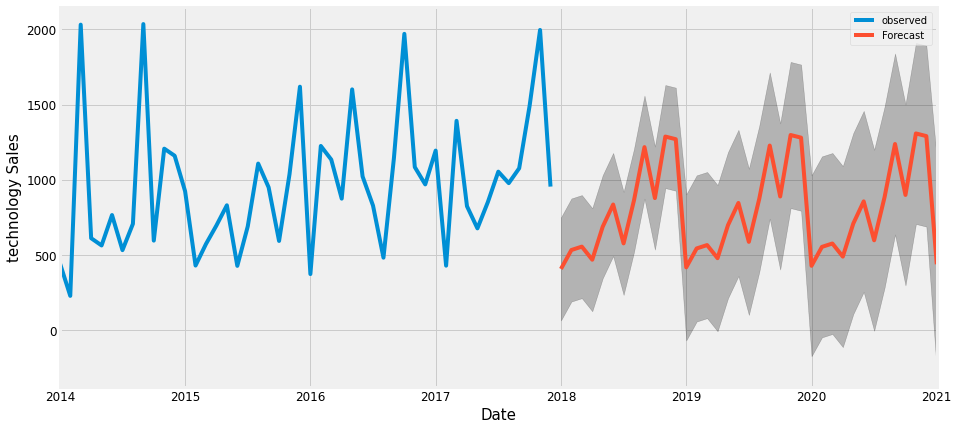

In [46]:
pred_uc=results_f.get_forecast(steps=37)
pred_ci=pred_uc.conf_int()
ax=yt.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')
plt.legend()
plt.show()

# DATA EXPLORATION

## COMPARING CATEGORIES

### FURNITURE

In [48]:
furniture1 = pd.DataFrame({'Order Date': yf.index , 'Sales':yf.values})
furniture1

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


### OFFICE SUPPLIES

In [49]:
office1 = pd.DataFrame({'Order Date': yo.index , 'Sales':yo.values})
office1

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588
2,2014-03-01,391.176318
3,2014-04-01,464.794750
4,2014-05-01,324.346545
5,2014-06-01,588.774409
6,2014-07-01,756.060400
7,2014-08-01,541.879143
8,2014-09-01,1015.677704
9,2014-10-01,267.078815


### TECHNOLOGY

In [50]:
technology1 = pd.DataFrame({'Order Date': yt.index , 'Sales':yt.values})
technology1

,Order Date,Sales
0,2014-01-01,449.041429
1,2014-02-01,229.787143
2,2014-03-01,2031.948375
3,2014-04-01,613.028933
4,2014-05-01,564.698588
5,2014-06-01,766.905909
6,2014-07-01,533.608933
7,2014-08-01,708.435385
8,2014-09-01,2035.838133
9,2014-10-01,596.900900


## MERGING

### FUNRNITURE AND OFFICE SUPPLIES

In [51]:
#office,furniture
store_office_furniture = furniture1.merge(office1, how='inner', on='Order Date')
store_office_furniture

,Order Date,Sales_x,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


In [52]:
store_office_furniture.rename(columns={'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


### OFFICE SUPPLIES AND TECHNOLOGY

In [53]:
#office,technolgy
store_office_technology = technology1.merge(office1, how='inner', on='Order Date')
store_office_technology

,Order Date,Sales_x,Sales_y
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545
5,2014-06-01,766.905909,588.774409
6,2014-07-01,533.608933,756.060400
7,2014-08-01,708.435385,541.879143
8,2014-09-01,2035.838133,1015.677704
9,2014-10-01,596.900900,267.078815


In [54]:
store_office_technology.rename(columns={'Sales_x':'technology_sales','Sales_y':'office_sales'},inplace=True)
store_office_technology

,Order Date,technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545
5,2014-06-01,766.905909,588.774409
6,2014-07-01,533.608933,756.060400
7,2014-08-01,708.435385,541.879143
8,2014-09-01,2035.838133,1015.677704
9,2014-10-01,596.900900,267.078815


### TECHNOLOGY AND FURNITURE

In [55]:
store_technology_furniture = furniture1.merge(technology1, how='inner', on='Order Date')
store_technology_furniture

,Order Date,Sales_x,Sales_y
0,2014-01-01,480.194231,449.041429
1,2014-02-01,367.931600,229.787143
2,2014-03-01,857.291529,2031.948375
3,2014-04-01,567.488357,613.028933
4,2014-05-01,432.049188,564.698588
5,2014-06-01,695.059242,766.905909
6,2014-07-01,601.169500,533.608933
7,2014-08-01,457.521656,708.435385
8,2014-09-01,992.353367,2035.838133
9,2014-10-01,769.015437,596.900900


In [56]:
store_technology_furniture.rename(columns={'Sales_x':'furniture_sales','Sales_y':'technology_sales'},inplace=True)
store_technology_furniture

,Order Date,furniture_sales,technology_sales
0,2014-01-01,480.194231,449.041429
1,2014-02-01,367.931600,229.787143
2,2014-03-01,857.291529,2031.948375
3,2014-04-01,567.488357,613.028933
4,2014-05-01,432.049188,564.698588
5,2014-06-01,695.059242,766.905909
6,2014-07-01,601.169500,533.608933
7,2014-08-01,457.521656,708.435385
8,2014-09-01,992.353367,2035.838133
9,2014-10-01,769.015437,596.900900


### FURNITURE OFFICE SUPPLIES AND TECHNOLOGY

In [57]:
#furniture,technolgy,office
store_office_furniture_technology = technology1.merge(store_office_furniture, how='inner', on='Order Date')
store_office_furniture_technology

,Order Date,Sales,furniture_sales,office_sales
0,2014-01-01,449.041429,480.194231,285.357647
1,2014-02-01,229.787143,367.931600,63.042588
2,2014-03-01,2031.948375,857.291529,391.176318
3,2014-04-01,613.028933,567.488357,464.794750
4,2014-05-01,564.698588,432.049188,324.346545
5,2014-06-01,766.905909,695.059242,588.774409
6,2014-07-01,533.608933,601.169500,756.060400
7,2014-08-01,708.435385,457.521656,541.879143
8,2014-09-01,2035.838133,992.353367,1015.677704
9,2014-10-01,596.900900,769.015437,267.078815


In [58]:
store_office_furniture_technology.rename(columns={'Sales':'technology_sales','Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture_technology

,Order Date,technology_sales,furniture_sales,office_sales
0,2014-01-01,449.041429,480.194231,285.357647
1,2014-02-01,229.787143,367.931600,63.042588
2,2014-03-01,2031.948375,857.291529,391.176318
3,2014-04-01,613.028933,567.488357,464.794750
4,2014-05-01,564.698588,432.049188,324.346545
5,2014-06-01,766.905909,695.059242,588.774409
6,2014-07-01,533.608933,601.169500,756.060400
7,2014-08-01,708.435385,457.521656,541.879143
8,2014-09-01,2035.838133,992.353367,1015.677704
9,2014-10-01,596.900900,769.015437,267.078815


## PLOTING

### FURNITURE AND OFFICE SUPPLIES

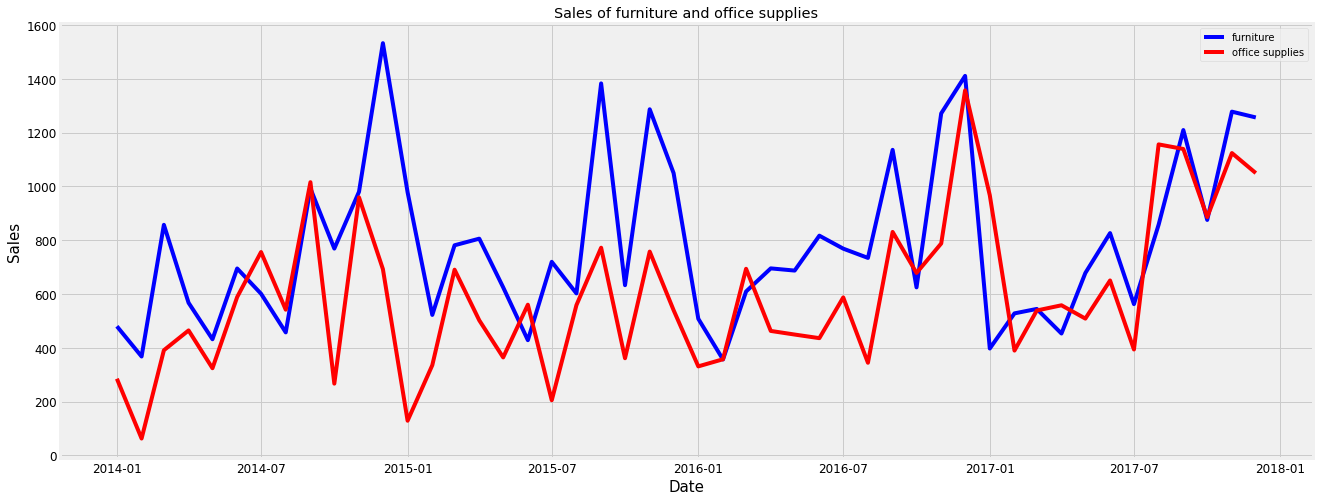

In [59]:
plt.figure(figsize=(20,8))
plt.plot(store_office_furniture['Order Date'],store_office_furniture['furniture_sales'],'b-',label='furniture')
plt.plot(store_office_furniture['Order Date'],store_office_furniture['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and office supplies')
plt.legend()

### OFFICE SUPPLIES AND TECHNOLOGY

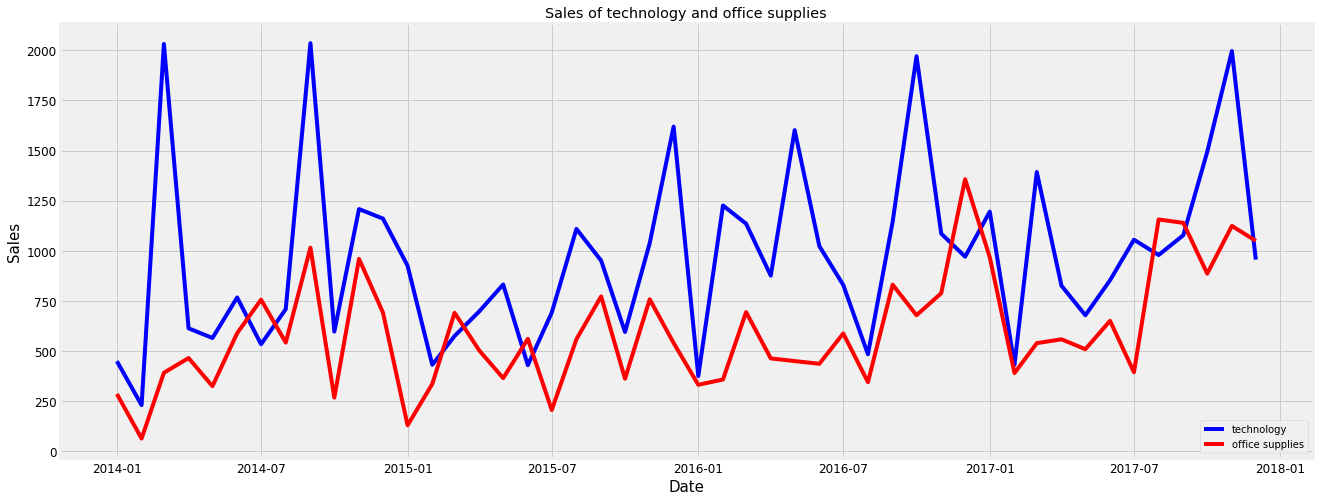

In [60]:
plt.figure(figsize=(20,8))
plt.plot(store_office_technology['Order Date'],store_office_technology['technology_sales'],'b-',label='technology')
plt.plot(store_office_technology['Order Date'],store_office_technology['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of technology and office supplies')
plt.legend()

### FURNITURE AND TECHNOLOGY

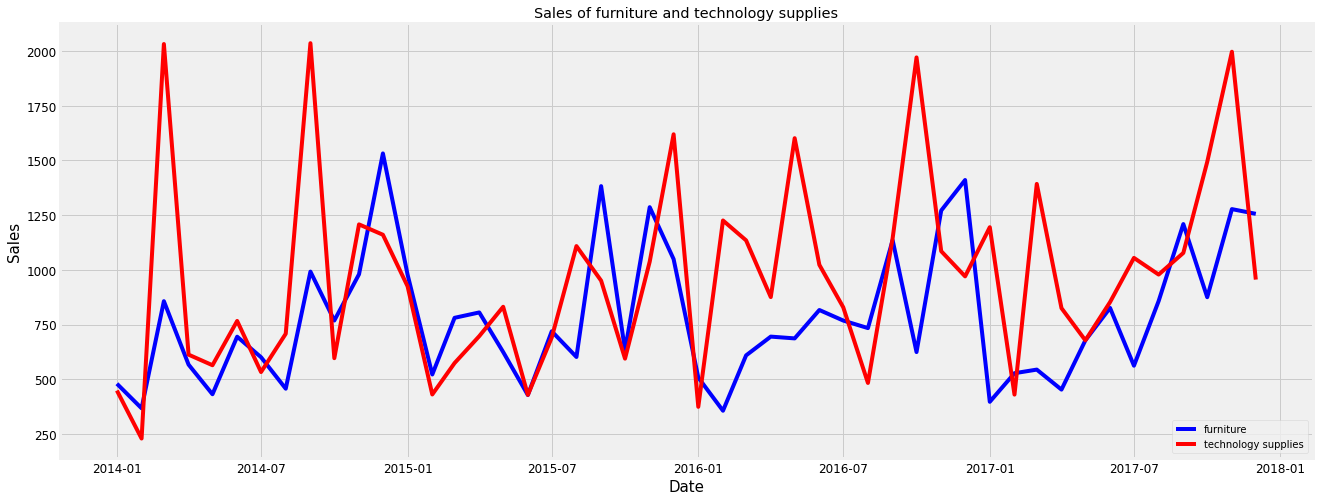

In [61]:
plt.figure(figsize=(20,8))
plt.plot(store_technology_furniture['Order Date'],store_technology_furniture['furniture_sales'],'b-',label='furniture')
plt.plot(store_technology_furniture['Order Date'],store_technology_furniture['technology_sales'],'r-',label='technology supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and technology supplies')
plt.legend()

### FURNITURE, OFFICE SUPPLIES AND TECHNOLOGY

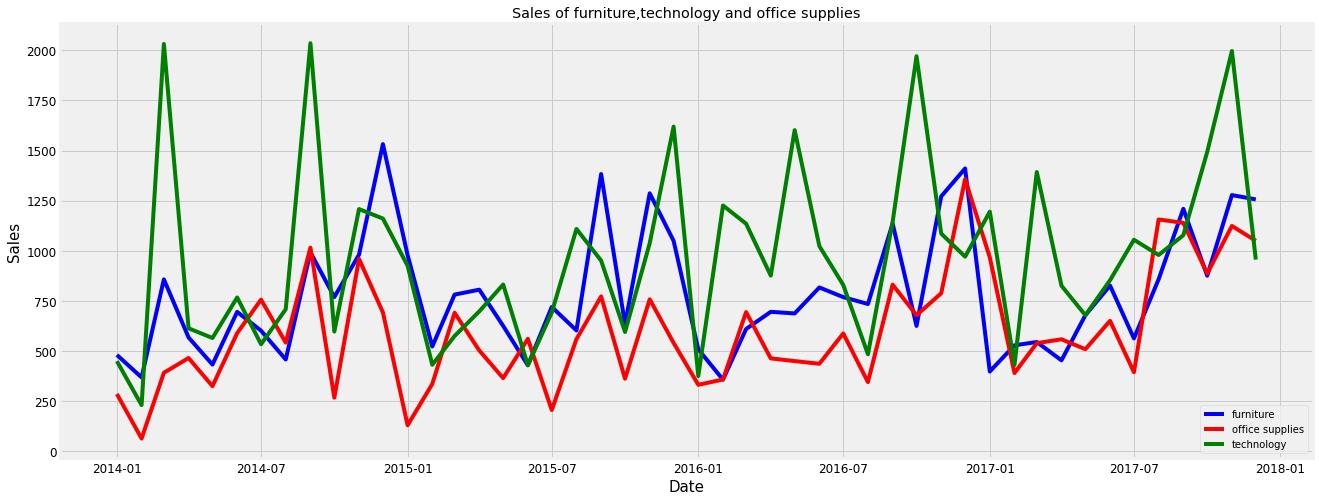

In [62]:
plt.figure(figsize=(20,8))
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['furniture_sales'],'b-',label='furniture')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['office_sales'],'r-',label='office supplies')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['technology_sales'],'g-',label='technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture,technology and office supplies')
plt.legend()

# USING PROPHET TO DEVELOP A FORECASTING SYSTEM

In [64]:
from fbprophet import Prophet

### FURNITURE

In [65]:
furniture1=furniture1.rename(columns={'Order Date':'ds','Sales':'y'})
furniture1_model=Prophet(interval_width=0.95)
furniture1_model.fit(furniture1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


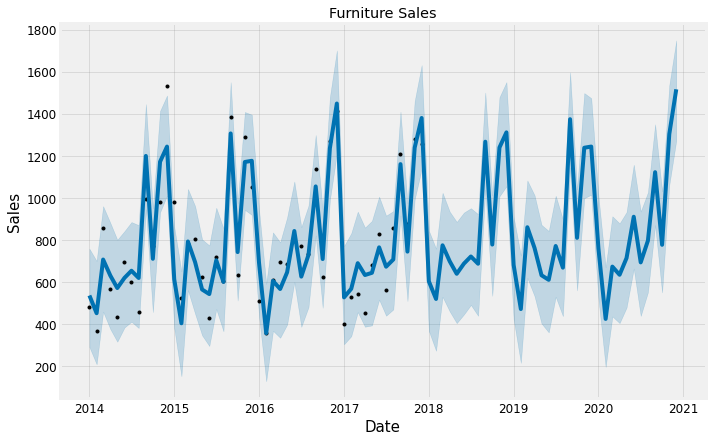

In [66]:
furniture1_forecast =furniture1_model.make_future_dataframe(periods=36,freq='MS')
furniture1_forecast =furniture1_model.predict(furniture1_forecast)

furniture1_model.plot(furniture1_forecast,xlabel='Date',ylabel='Sales')
plt.title('Furniture Sales');

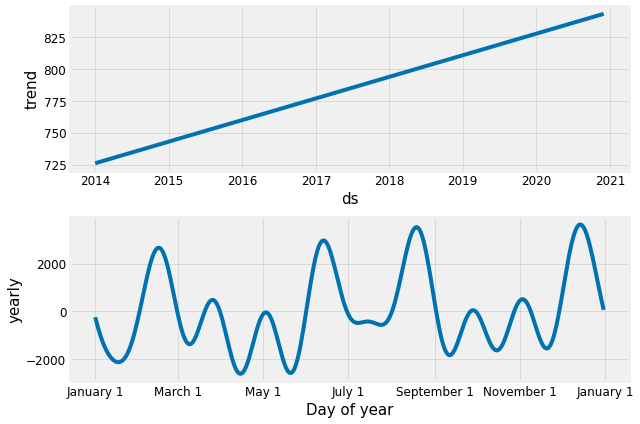

In [67]:
furniture1_model.plot_components(furniture1_forecast);

### OFFICE SUPPLIES

In [68]:
office1=office1.rename(columns={'Order Date':'ds','Sales':'y'})
office1_model=Prophet(interval_width=0.95)
office1_model.fit(office1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x720 with 0 Axes>

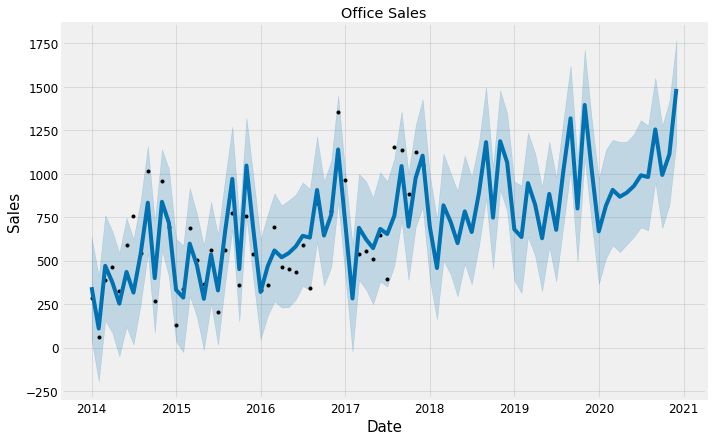

In [69]:
office1_forecast =office1_model.make_future_dataframe(periods=36,freq='MS')
office1_forecast =office1_model.predict(office1_forecast)

plt.figure(figsize=(18,10))
office1_model.plot(office1_forecast,xlabel='Date',ylabel='Sales')
plt.title('Office Sales');

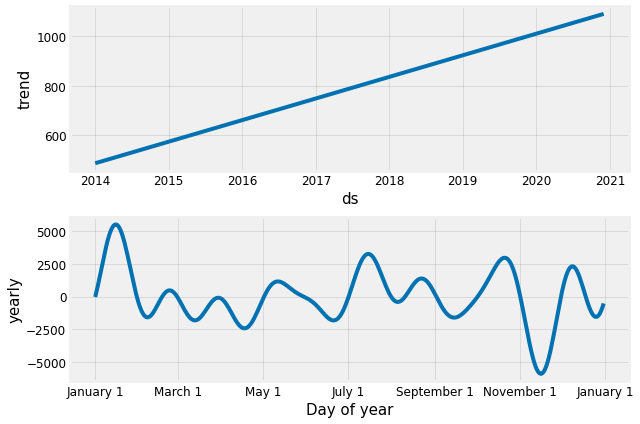

In [70]:
office1_model.plot_components(office1_forecast);

### TECHNOLOGY

In [71]:
technology1=technology1.rename(columns={'Order Date':'ds','Sales':'y'})
technology1_model=Prophet(interval_width=0.95)
technology1_model.fit(technology1)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

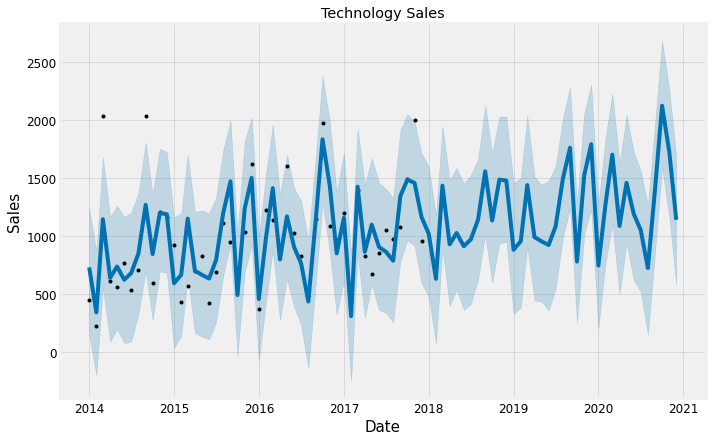

In [72]:
technology1_forecast =technology1_model.make_future_dataframe(periods=36,freq='MS')
technology1_forecast =technology1_model.predict(technology1_forecast)


plt.figure(figsize=(18,6))
technology1_model.plot(technology1_forecast,xlabel='Date',ylabel='Sales')
plt.title('Technology Sales');

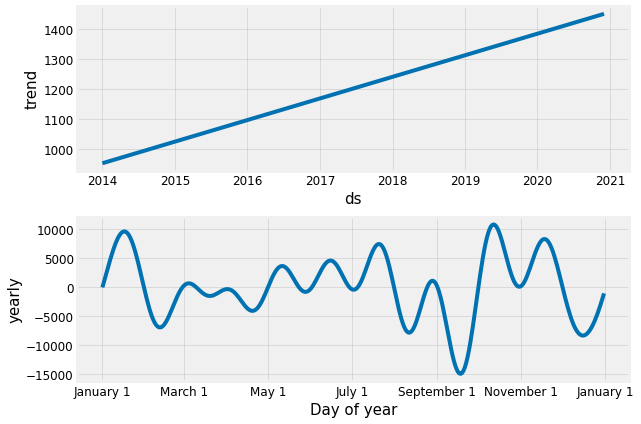

In [73]:
technology1_model.plot_components(technology1_forecast);